# Numerical Linear Algebra for Big Data
Professor Prasad

Course Project

Ketan Patel, Matthew Benvenuto, Noah Guralnik

August 2022

# 1. Abstract

This report explores the use of Singular Value Decomposition(SVD) with regards to image recognition of an American Sign Language(ASL) database. For far too long the audiologically impaired have been a marginalized community in America. Without proper equipment, deaf individuals often find themselves lacking in means of communication. While written communication is a decent option, the community would also benefit from another, perhaps more pertinent method of communication. 

Incorporating skills from a variety of Linear Algebra techniques this report seeks to accurately recognize and dedicate candidate images based on a complex algorithm that analyzes thousands of images featuring different gestures using eigen-sign analysis.

# 2. Introduction

### This project aims to explore the use of Principal Component Analysis (PCA) when applied to an American Sign Language (ASL) database. 

**The driving motivation** We want to scan a video in real time and to detect gestures and recognize the gestures in real time. Also, the aim for PCA applied on the database is to reduce the space complexity, by importing the dominant features associated with individual gestures within the sign language to increase classification accurracy of a predictive model. 

---

**Exploring Randomized SVD** may provide useful to reducing the space complexity of image matrices when targetting the dominant image features, and will speed up the our gesture recognition and gesture detection

---

As an overarching idea, a **comparitive analysis** between **Eigen-Sign Recognition** and **Machine Learning Models**

## **What is PCA?**

PCA is a statistical procedure that aims to reduce dimensionality without losing the original properties. It describes the composition of variances and covariances through several linear combinations of primary variables. Analyzing the principle componenets allows us to explain associations between variables that were not necessarily obvious at higher dimensions.
Properties of principal components are as follows:

1) The principal components are linear combinations of the original variables, the weights vector in this combination is actually the eigenvector found which in turn satistied the principles of least squares

2) The principle components are orthogonal.

3) The variation present in the principle components decrease as we move from 1st to last.

SOURCES:

https://www.projectpro.io/data-science-in-python-tutorial/principal-component-analysis-tutorial

https://builtin.com/data-science/step-step-explanation-principal-component-analysis



## ***What are the steps of PCA?***

**STEP 1:** Standardization
Standardize the range of continous variables so that each one contributes equally to the analysis.
Mathematically, this can be done with the following formula: 
Z = (value-mean)/Standard Deviation

**STEP 2:** Covariance Matrix Computation
The purpose of this step is to determine if there is a relationship between any of the variables.
The sign of the covariance dictates the relationship between 2 variables.
If positive, the two variables are positively correlated and therefore increase together.
If negative, the two variables are negatively correlated and therefore decrease together.

**STEP 3:** Compute the Eigenvectors and Eigenvalues of the Covariance Matrix
The eigenvectors of the covariance matrix are the directions of the axes where there is the most variance (information). That is what we refer to as a Principal Component. Eigenvalues are therefore the coefficients of each eigenvector, and determine the amount of variance within each principal component.
We then rank the eigenvectors in order of the eigenvalues, large to small, which allows us to see the principal components in order of significance.

**STEP 4:** Feature Vector
The purpose of this step is to determine whether we keep all principal components, or if we can discard some of those of less significance.
The feature vector is therefore the matrix of eigenvectos that we've decided to keep (i.e. the significant ones).

**STEP 5:** Recast the Data Along the Principal Component Axes
Using the remaining feature vector, we reorient the data from its original axes to the ones represented by the principal components. We can do this by multipllying the transpose of the original data set by the transpose of the feature vector.

# 3. Methodology

**The method being used in this process can be broken into steps:**


1.   Parse the data to grab the images
2.   Greyscale the images and convert each image into a column vector
3.   Append all the images into X (mega_matrix) where each column is an image vector
4.   Calculate the mean_sign image and display the results.

**Image Recognition Algorithim**


1. Apply Randomized SVD with specified parameters to X (mega_matrix)
2. Build the alpha_candidate vector and subtract mean face from the x_candidate image and project onto the sign face using U_k_Transpose. 
3. Build the alpha, weight vector which projects the [ X(mega-matrix) - mean_sign]
4. Compare each alpha_candadate to each column alpha_weight_vector and select the image in database that is closest via the 2-norm.
5. Plot the image recognized!

**Image Detection**

1. Build x_tilda which is candidate_image - mean_sign
2. Project x_tilda onto the sign space using randomized SVD U_k * U_k_T projection 
3. Take the 2-norm of [ x_tilda - projection(x_tilda) ]
4. return distance

**Video-Image Spliced- Gesture Recognition**
1. Upload a video and convert video to frames
2. Pass each frace as a candidate image to image recognition algorithim!
3. Analyze Results



# **Pip install packages and imports**

In [ ]:
# pip install packages
!pip install keras 
!pip install tensorflow
!pip install pydot
!pip install opencv-python

In [5]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import zipfile
import random

# Imports for Deep Learning
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

# ensure consistency across runs
from numpy.random import seed
seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)

# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

#other useful stuff
from numpy.linalg import norm 
from skimage.io import imread
from PIL import Image

#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

# **Lets Meet the Data**

In [6]:
test_path = "C:/Users/Matthew Benvenuto/Downloads/archive/asl_alphabet_test/asl_alphabet_test"
print(test_path)

C:/Users/Matthew Benvenuto/Downloads/archive/asl_alphabet_test/asl_alphabet_test


In [174]:
folder = '/content/drive/MyDrive/SignLanguage/asl_alphabet_test'
#folder = "C:/Users/Matthew Benvenuto/Downloads/archive/asl_alphabet_test/asl_alphabet_test"
test_dir=os.listdir(folder)[:]
print(len(test_dir))
print(test_dir)


28
['R_test.jpg', 'A_test.jpg', 'P_test.jpg', 'space_test.jpg', 'N_test.jpg', 'J_test.jpg', 'M_test.jpg', 'B_test.jpg', 'L_test.jpg', 'Y_test.jpg', 'nothing_test.jpg', 'C_test.jpg', 'Q_test.jpg', 'G_test.jpg', 'V_test.jpg', 'I_test.jpg', 'T_test.jpg', 'X_test.jpg', 'S_test.jpg', 'O_test.jpg', 'F_test.jpg', 'U_test.jpg', 'H_test.jpg', 'Z_test.jpg', 'W_test.jpg', 'K_test.jpg', 'E_test.jpg', 'D_test.jpg']


**Here we have 28 gestures and 1 gesture containing nothing that we will remove**

In [175]:
file_paths = []
sign_images = []
subfolder_list= []
for subfolder in test_dir:
    if(subfolder == 'nothing_test.jpg'):
        continue
    file_paths = [folder + '/' + subfolder]
    sign_images = sign_images + file_paths
    subfolder_list.append(subfolder)
print(len(sign_images))
print(sign_images[1:11])
print(sign_images[1][-3:])
sign_test_data = [photo for photo in sign_images if photo [-3:] == 'jpg']
len(sign_test_data)

27
['/content/drive/MyDrive/SignLanguage/asl_alphabet_test/A_test.jpg', '/content/drive/MyDrive/SignLanguage/asl_alphabet_test/P_test.jpg', '/content/drive/MyDrive/SignLanguage/asl_alphabet_test/space_test.jpg', '/content/drive/MyDrive/SignLanguage/asl_alphabet_test/N_test.jpg', '/content/drive/MyDrive/SignLanguage/asl_alphabet_test/J_test.jpg', '/content/drive/MyDrive/SignLanguage/asl_alphabet_test/M_test.jpg', '/content/drive/MyDrive/SignLanguage/asl_alphabet_test/B_test.jpg', '/content/drive/MyDrive/SignLanguage/asl_alphabet_test/L_test.jpg', '/content/drive/MyDrive/SignLanguage/asl_alphabet_test/Y_test.jpg', '/content/drive/MyDrive/SignLanguage/asl_alphabet_test/C_test.jpg']
jpg


27

**Displaying one image of the test data**

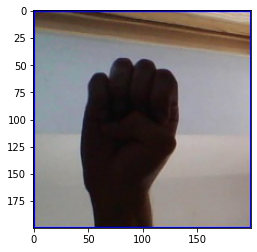

In [11]:
from skimage.io import imread
image = imread(sign_test_data[25])
type(image)
plt.imshow(image,cmap=plt.cm.gray)

**Displaying another image of the test dataset**

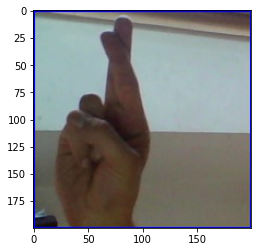

In [13]:
from skimage.io import imread
image = imread(sign_test_data[0])
plt.imshow(image,cmap=plt.cm.gray)

# **Displaying the 26 Signs in the ASL sign language from the test data.**

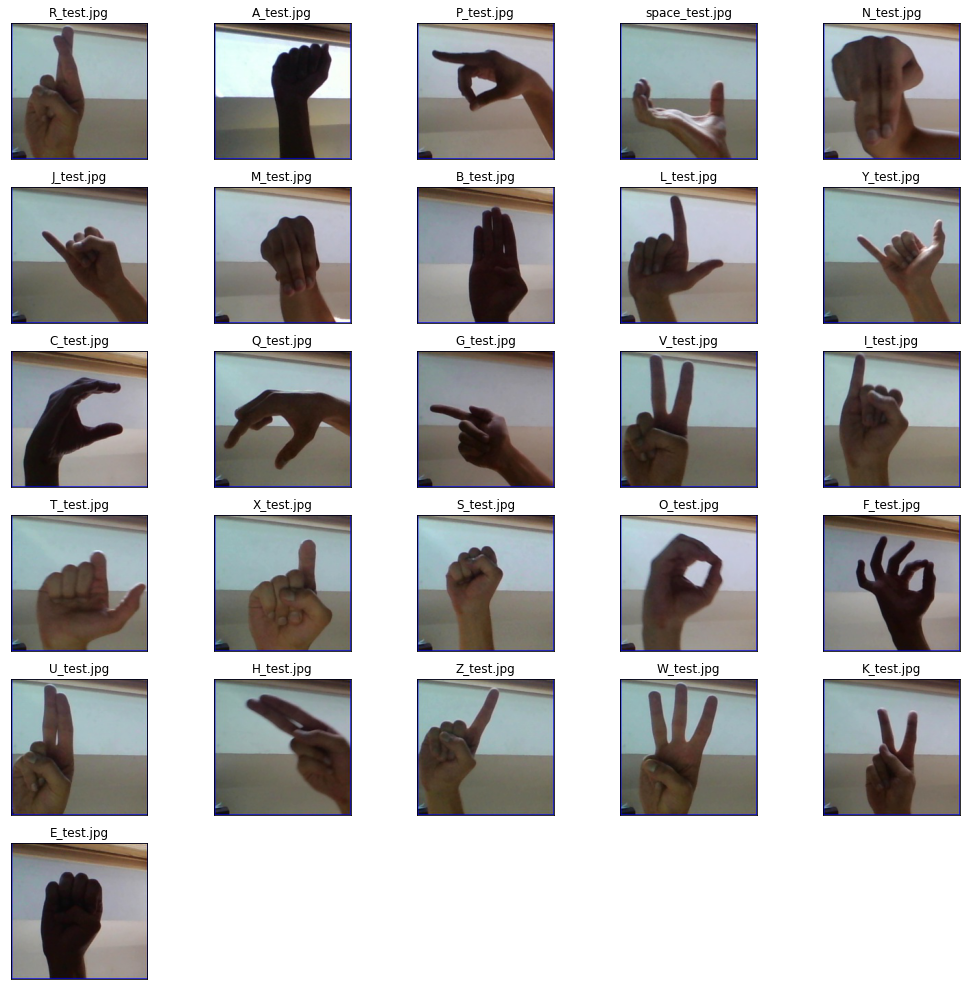

In [178]:
#Lets display all of the characters in the sign language
plt.figure(figsize=(2.2 * 8, 2.2 * 8))
for i in range (0,26,1):
    plt.subplot(6,5,i+1)
    image = imread(sign_test_data[i])
    plt.title(subfolder_list[i])
    plt.imshow(image,cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

In [103]:
height = image.shape[0]
width = image.shape[1]
depth = image.shape[2] 
total_pixels_per_image = height*width*depth

In [180]:
number_samples = len(sign_test_data) #All of the images within the data set
print("The number of gestures in ASL sign language test database:", number_samples)
print("The image shape is: ", image.shape)
print("The image height is:",height)
print("The image width is: ",width)
print("The image depth(color channels) is: ",depth)
print("The total pixels per image for a colored image is: ", total_pixels_per_image)
print("The total pixels per image for a black and white image is: ", total_pixels_per_image/3, "which is 3 times smaller")

The number of gestures in ASL sign language test database: 27
The image shape is:  (200, 200, 3)
The image height is: 200
The image width is:  200
The image depth(color channels) is:  3
The total pixels per image for a colored image is:  120000
The total pixels per image for a black and white image is:  40000.0 which is 3 times smaller


In [181]:
print("Pre-reshapping",plt.imread(sign_test_data[0]).shape)
print("Reshaping: ",plt.imread(sign_test_data[0]).reshape(-1,1).shape)
print("Reshaped, removing color: (40000, 1)")

Pre-reshapping (200, 200, 3)
Reshaping:  (120000, 1)
Reshaped, removing color: (40000, 1)


**Building the X1 matrix, where each column is a black and white image with 40,000 pixels**

In [104]:
X1 = mega_matrix_X(sign_test_data)

In [182]:
print("The Shape of X1:",X1.shape)

The Shape of X1: (40000, 27)


In [187]:
print("X1:",X1[:][0])

X1: [21.7462 20.5317 25.4674 20.3154 25.5395 23.2491 24.8241 24.8241 25.4674
 20.4596 23.8203 22.3895 24.752  21.6741 21.7462 22.4616 19.5279 21.1029
 27.6857 26.8261 21.7462 24.3915 19.6721 23.177  22.4616 25.3232 24.2473]


In [ ]:
n_components = 27
P, C, M, Y= eigensigns(X1, n_components)

# **Fascinating Mean Sign(Gesture)**

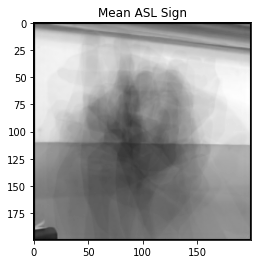

In [189]:
plt.imshow(M.reshape((height, width)),cmap=plt.cm.gray)
plt.title("Mean ASL Sign")
plt.show()
Mean_sign = M.reshape((height, width))

# **Functions built to do the *mega-matrix* building** 

In [101]:
color_weight = [0.2125, 0.7154, 0.0721]; # LUMA-REC.709
pix_gray = np.dot(image[..., 0:3], color_weight)
new_height = pix_gray.shape[0]
new_width = pix_gray.shape[1]
total_pixs = new_height * new_width
print("The rgb picture can be converted into grayscale with new dimension:",pix_gray.shape)

The rgb picture can be converted into grayscale with new dimension: (200, 200)


In [102]:
#This matrix is built specifically to make the eigensign matrix where each column is a sign image in vector representation
def mega_matrix_X(all_images):
    color_weight = [0.2125, 0.7154, 0.0721]; # LUMA-REC.709
    number_samples = len(all_images)
    # total pix is defined to be new_height * new_width a few lines above ^^
    X = np.zeros((total_pixs, number_samples), dtype=np.float64) #Setting up a matrix X of column with all number_samples
    i = 0
    for image in all_images:
        
        #This is arithimetic to convert the image into gray scaale using color weight and build X vector
        pix_gray = np.dot(plt.imread(image)[..., 0:3], color_weight)
        Xi = pix_gray.reshape(-1,1)
        
        #Filling the Mega X Matrix
        if Xi.shape[0]==total_pixs:
            X[:,i]=Xi[:,0]
            i=i+1
        else:
            print("Discarding image because of incorrect dimension: {}".format(image))
    return X

# **Functions for candidate recognition and sign detection**

In [88]:
#This will take in a list of file paths, and will return a recognized sign letter
def candidate_recognition_predictor(image_file_path):
    #Reads the image file path in and then converts into gray scale
    image = Image.open(image_file_path)
    new_200 = image.resize((200, 200))
    candidate_image = np.array(new_200)
    candidate_image = np.dot(candidate_image[..., 0:3], color_weight)
    
    #Running the Randomized SVD: Hyperparameter choices are optimized and tuned
    r = 50 # Target rank
    q = 1   # Power iterations
    p = 5   # Oversampling parameter
    rU, rS, rVT = randomized_SVD(X1,r,q,p)
    weight_vector= np.diag(rS).dot(rVT)
    
    #Then I will build x_tilda , and the original weight_vector
    #x_tilda = candidate_image-Mean_sign
    #x_tilda = x_tilda.reshape(-1,1)
    
    x_tilda= candidate_image.reshape(-1,1)-M.reshape(-1,1)
    
    # Now we want to apply the projection of the alpha : Projection of the candidate weight
    alpha = rU.T.dot(x_tilda)
    
    #original_weight_vector : Projection of the database weights
    original_weight_vector = rU.T.dot(X1-M.reshape(-1,1))
    
    #Build are vector of candidate to the database
    vector = []
    length_columns = len(original_weight_vector[0])
    #Essentially subtracting the candidate matrix from the each individual column of alpha matrix
    # and appending the norm to the list
    for i in range(length_columns):
        vector.append(norm((original_weight_vector.T[i] - alpha),2)) 
        # vector.append(norm((original_weight_vector.T[i] - alpha),2)/norm(original_weight_vector.T[i],2))
    
    #Before returning we could even quickly plot the image that is closest via the 2-norm
    recognized_image_index = np.argmin(np.array(vector))
    recognized_image = imread(sign_test_data[recognized_image_index])
    plt.imshow(recognized_image,cmap=plt.cm.gray)
    
    #returning the index of the min vector
    return recognized_image_index 

In [190]:
def sign_detection(image_file_path):
    image = Image.open(image_file_path)
    new_200 = image.resize((200, 200))
    candidate_image = np.array(new_200)
    candidate_image = np.dot(candidate_image[..., 0:3], color_weight)
    
    #Running the Randomized SVD: Hyperparameter choices are optimized and tuned
    r = 400 # Target rank
    q = 1   # Power iterations
    p = 5   # Oversampling parameter
    rU, rS, rVT = randomized_SVD(X1,r,q,p)
    rU_rU_T = np.diag(rU).dot(rU.T)
    #Then I will build x_tilda , and the original weight_vector
    x_tilda = candidate_image-Mean_sign
    x_tilda = x_tilda.reshape(-1,1)
    
    delta = norm(x_tilda-rU_rU_T.dot(x_tilda),2)
    return delta

# **Showcasing some sign dection norms and sign recognition**

# **Matt peace sign recognition**

Matt peace sign with white background DELTA: 6801.981628117551


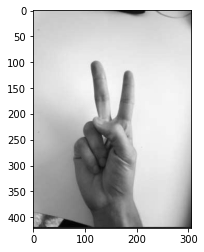

In [191]:
matt_delta = sign_detection("/content/drive/MyDrive/matt_peace.JPG")
print("Matt peace sign with white background DELTA:",matt_delta)

matt_peace = np.dot(plt.imread("/content/drive/MyDrive/matt_peace.JPG")[..., 0:3], color_weight)
plt.imshow(matt_peace,cmap=plt.cm.gray)

#**Matt peace sign which represents letter V being passed to gesture recognition algorithim 30 different times!**

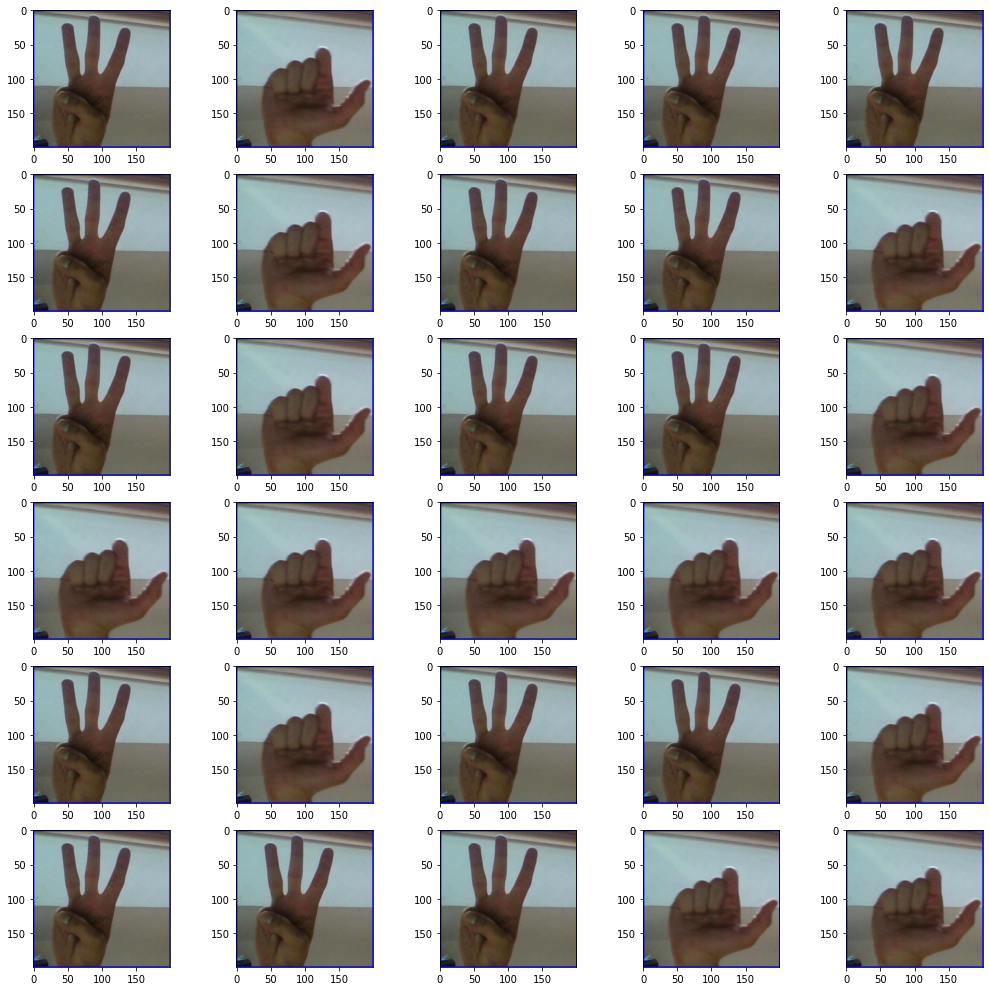

In [94]:
#With the original M
plt.figure(figsize=(2.2 * 8, 2.2 * 8))
for i in range (0,30,1):
    plt.subplot(6,5,i+1)
    candidate_recognition_predictor("/content/drive/MyDrive/matt_peace.JPG")

# **Ketan Peace Recognition**

Ketan fist DELTA: 13991.691428534876


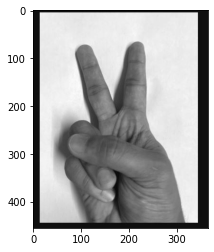

In [192]:
ketan_hand = sign_detection("/content/drive/MyDrive/ketan_hand.JPG")
print("Ketan fist DELTA:",ketan_hand)

ketan_hand_img = np.dot(plt.imread("/content/drive/MyDrive/ketan_hand.JPG")[..., 0:3], color_weight)
plt.imshow(ketan_hand_img,cmap=plt.cm.gray)


#**Ketan peace sign which represents letter V being passed to gesture recognition algorithim 30 different times!**

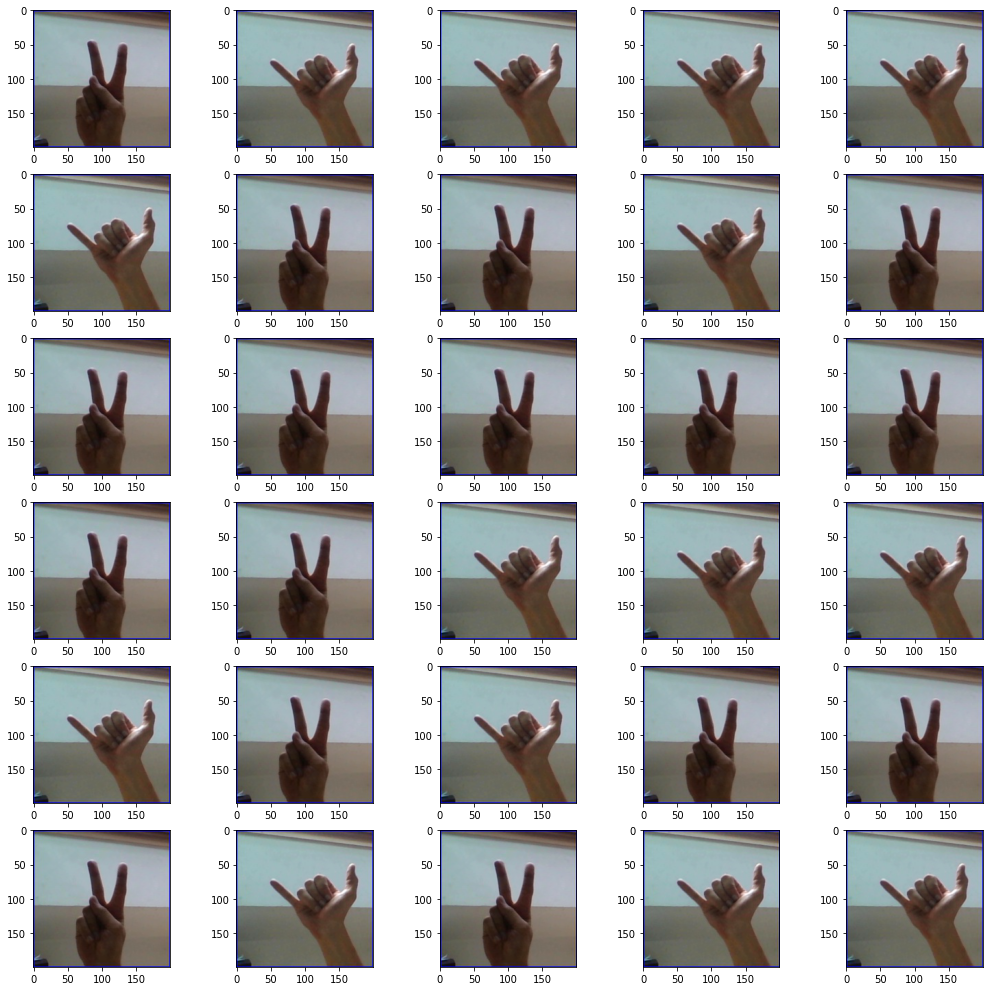

In [96]:
#With the original M
plt.figure(figsize=(2.2 * 8, 2.2 * 8))
for i in range (0,30,1):
    plt.subplot(6,5,i+1)
    candidate_recognition_predictor("/content/drive/MyDrive/ketan_hand.JPG")

# **Ketan Fist Recognition**

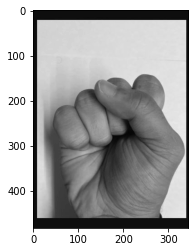

In [37]:
ketan_fist = sign_detection("/content/drive/MyDrive/ketan_fist.JPG")
print("Ketan fist DELTA:",ketan_fist)

ketan_fist_img = np.dot(plt.imread("/content/drive/MyDrive/ketan_fist.JPG")[..., 0:3], color_weight)
plt.imshow(ketan_fist_img,cmap=plt.cm.gray)

#**Ketan Fist sign which represents letter S being passed to gesture recognition algorithim 30 different times!**

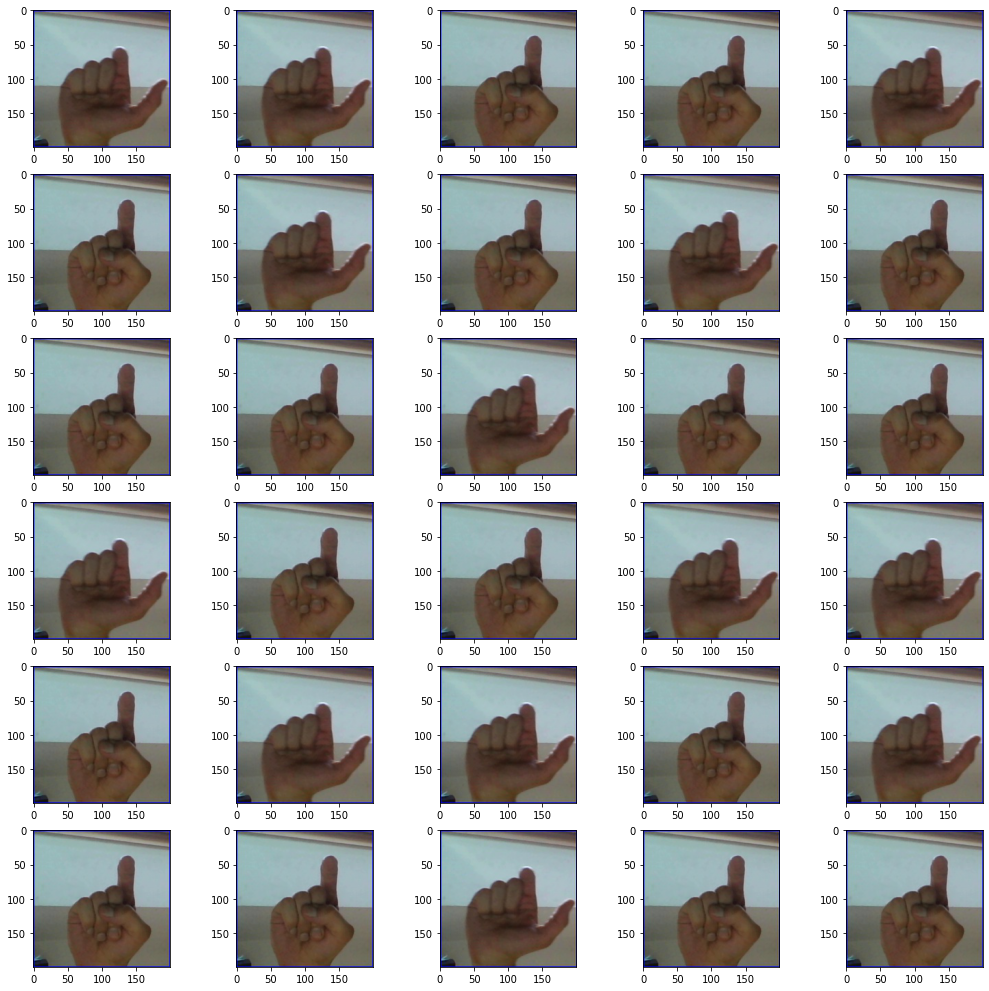

In [108]:
#With the original M
plt.figure(figsize=(2.2 * 8, 2.2 * 8))
for i in range (0,30,1):
    plt.subplot(6,5,i+1)
    candidate_recognition_predictor("/content/drive/MyDrive/ketan_fist.JPG")

# **Usa Flag Recognition [SOOOOO AMAZING LOOK AT RESULTS]** 

In [35]:
usa_flag = sign_detection("/content/drive/MyDrive/usa_flag.png")
print("USA Flag DELTA:",usa_flag)

USA Flag DELTA: 21531.365290559075


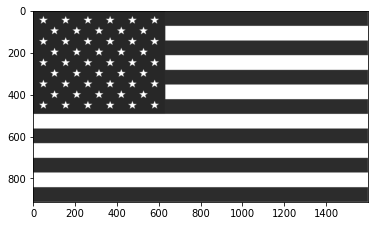

In [38]:
usa_img = np.dot(plt.imread("/content/drive/MyDrive/usa_flag.png")[..., 0:3], color_weight)
plt.imshow(usa_img,cmap=plt.cm.gray)

#**American Flag being passed to gesture recognition algorithim 30 different times!**

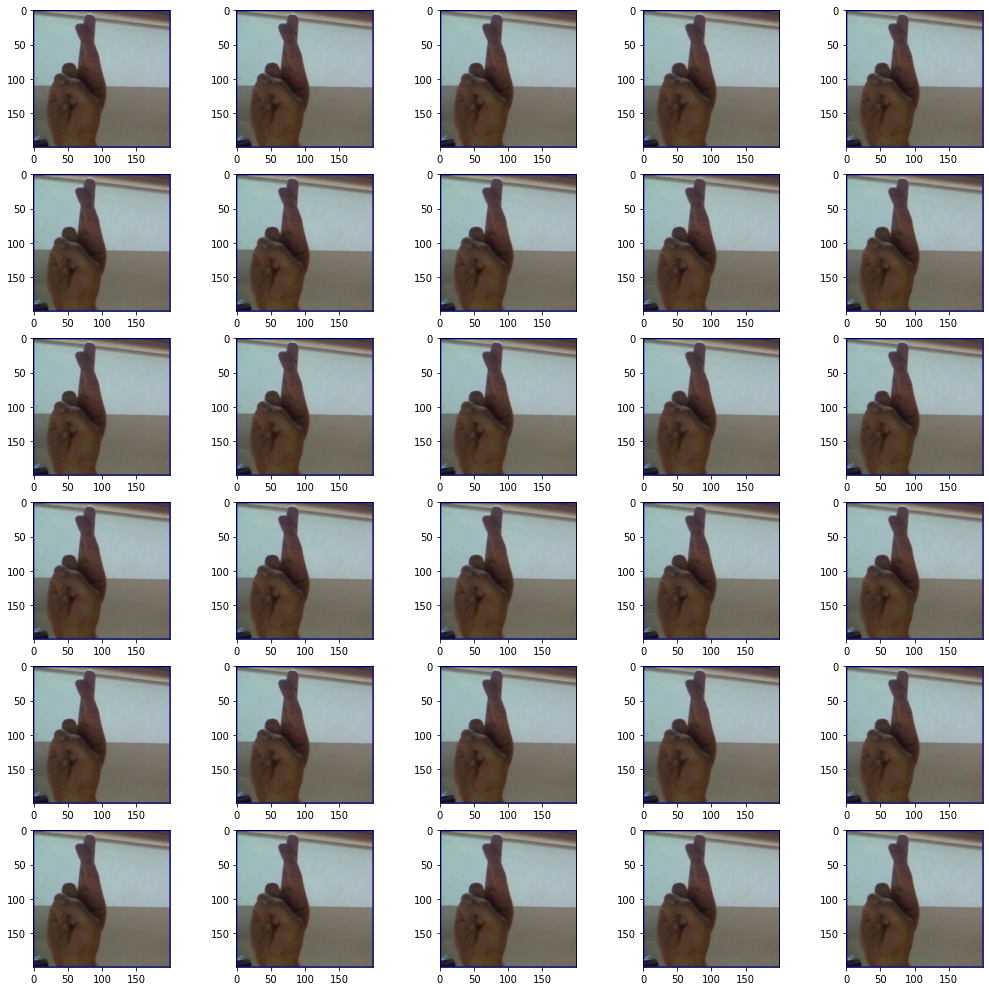

In [107]:
#With the original M
plt.figure(figsize=(2.2 * 8, 2.2 * 8))
for i in range (0,30,1):
    plt.subplot(6,5,i+1)
    candidate_recognition_predictor("/content/drive/MyDrive/usa_flag.png")

# **Frog Hand Recognition**

Frog hand DELTA: 22446.35077263324


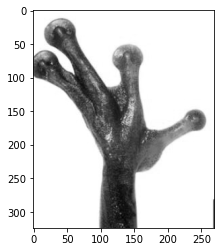

In [100]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt
frog_hand = np.dot(plt.imread("/content/drive/MyDrive/frog_hand.JPG")[..., 0:3], color_weight)
rotated_frog_img = ndimage.rotate(frog_hand, 1.5*60)

frog_hand_delta = sign_detection("/content/drive/MyDrive/frog_hand.JPG")
print("Frog hand DELTA:",frog_hand_delta)

plt.imshow(rotated_img,cmap=plt.cm.gray)

#**Frog sign being passed to gesture recognition algorithim 30 different times!**
---
Yielded some similarity circular geometries and forearm similarity results

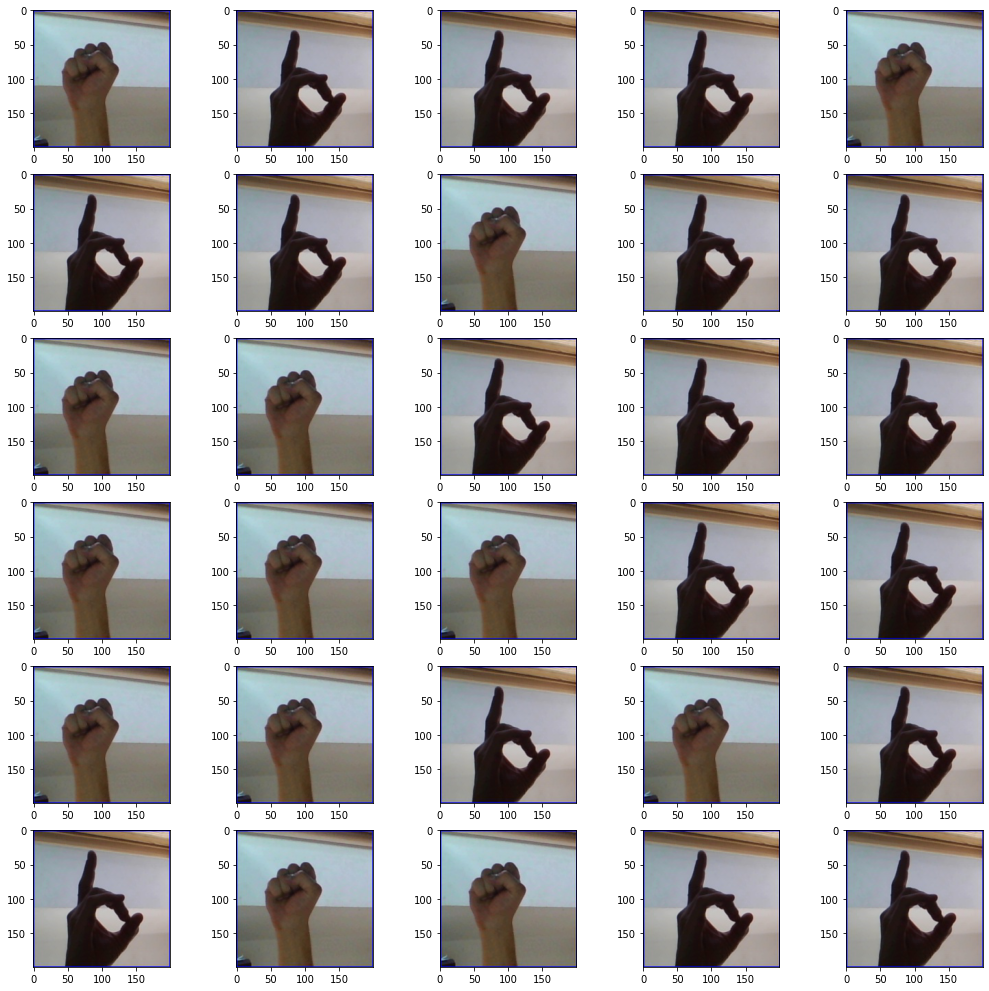

In [106]:
#With the original M
plt.figure(figsize=(2.2 * 8, 2.2 * 8))
for i in range (0,30,1):
    plt.subplot(6,5,i+1)
    candidate_recognition_predictor("/content/drive/MyDrive/frog_hand.JPG")

**Dinosaur Recognition and Detection**


# Here comes the Video Gesture attempt

In [109]:
import cv2
vidcap = cv2.VideoCapture('/content/20220808_205906.mp4')
success,image = vidcap.read()
count = 0
while success:
  if (count%10 == 0):
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
  count += 1

**Video to image converter: This is useful if we want to take a personal video of our hands and to detect the overall translation capabilities of our model**
---
The design schema for our recording can be as follows:

1). Start the video with a ASL sign.

2). Wait 5 seconds and then throw up another sign. 

3). Repeat this block style of pause and sign, until communication is finished. 

---

If we want we can artificially upload a string of ordered images and then analyze the ordered communication accruacy.[i.e. a sentence in ASL]

In [122]:
video_frames_path = '/content/drive/MyDrive/sign_video-opencv'
#folder = "C:/Users/Matthew Benvenuto/Downloads/archive/asl_alphabet_test/asl_alphabet_test"
video_frames_dir=os.listdir(video_frames_path)[:]
print("There are {} images".format( len(video_frames_dir)))
print(video_frames_dir)

There are 16 images
['frame0-00-06.03.jpg', 'frame0-00-03.03.jpg', 'frame0-00-04.53.jpg', 'frame0-00-04.03.jpg', 'frame0-00-01.53.jpg', 'frame0-00-02.03.jpg', 'frame0-00-05.03.jpg', 'frame0-00-03.53.jpg', 'frame0-00-02.53.jpg', 'frame0-00-05.53.jpg', 'frame0-00-01.03.jpg', 'frame0-00-00.53.jpg', 'frame0:00:00.00.jpg', 'frame0-00-07.53.jpg', 'frame0-00-06.53.jpg', 'frame0-00-07.03.jpg']


In [123]:
video_frames_file_paths = []
video_frames_sign_images = []
for subfolder in video_frames_dir:
    if(subfolder == 'nothing_test.jpg'):
        continue
    video_frames_file_paths = [video_frames_path + '/' + subfolder]
    video_frames_sign_images = video_frames_sign_images + video_frames_file_paths
    
print(len(video_frames_sign_images))
print(video_frames_sign_images[1:11])
print(video_frames_sign_images[1][-3:])
video_frames_data = [photo for photo in video_frames_sign_images if photo [-3:] == 'jpg']
len(video_frames_data)

16
['/content/drive/MyDrive/sign_video-opencv/frame0-00-03.03.jpg', '/content/drive/MyDrive/sign_video-opencv/frame0-00-04.53.jpg', '/content/drive/MyDrive/sign_video-opencv/frame0-00-04.03.jpg', '/content/drive/MyDrive/sign_video-opencv/frame0-00-01.53.jpg', '/content/drive/MyDrive/sign_video-opencv/frame0-00-02.03.jpg', '/content/drive/MyDrive/sign_video-opencv/frame0-00-05.03.jpg', '/content/drive/MyDrive/sign_video-opencv/frame0-00-03.53.jpg', '/content/drive/MyDrive/sign_video-opencv/frame0-00-02.53.jpg', '/content/drive/MyDrive/sign_video-opencv/frame0-00-05.53.jpg', '/content/drive/MyDrive/sign_video-opencv/frame0-00-01.03.jpg']
jpg


16

# **Video to Frame conversion Using code in my other google colab environment linked below**

---
https://colab.research.google.com/drive/1TzQwTm6mu6NDqT4hnJMooJzvCSQJl8_c?authuser=3


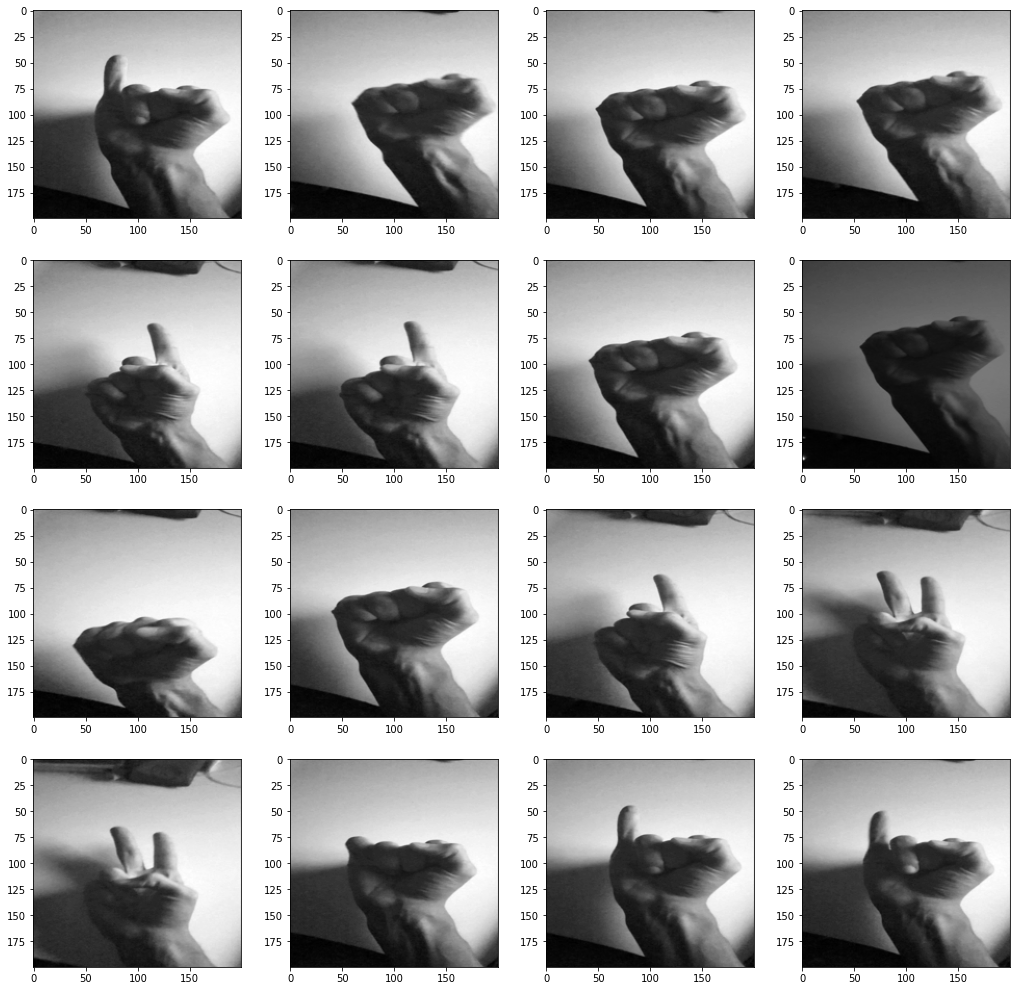

In [128]:
plt.figure(figsize=(2.2 * 8, 2.2 * 8))
count=0
for image_path in video_frames_data:
  plt.subplot(4,4,count+1)
  image = Image.open(image_path)
  new_ketan_200 = image.resize((200, 200))
  candidate_image = np.array(new_ketan_200)
  candidate_image = np.dot(candidate_image[..., 0:3], color_weight)
  plt.imshow(candidate_image,cmap=plt.cm.gray)
  count= count+1
plt.show()

# *The Video Model's gesture recognition did not produce the best quality images*, but even still the gesture model managed pretty well, **bottom two rows are close , and third column nice** as seen below in the 30 function recognition calls

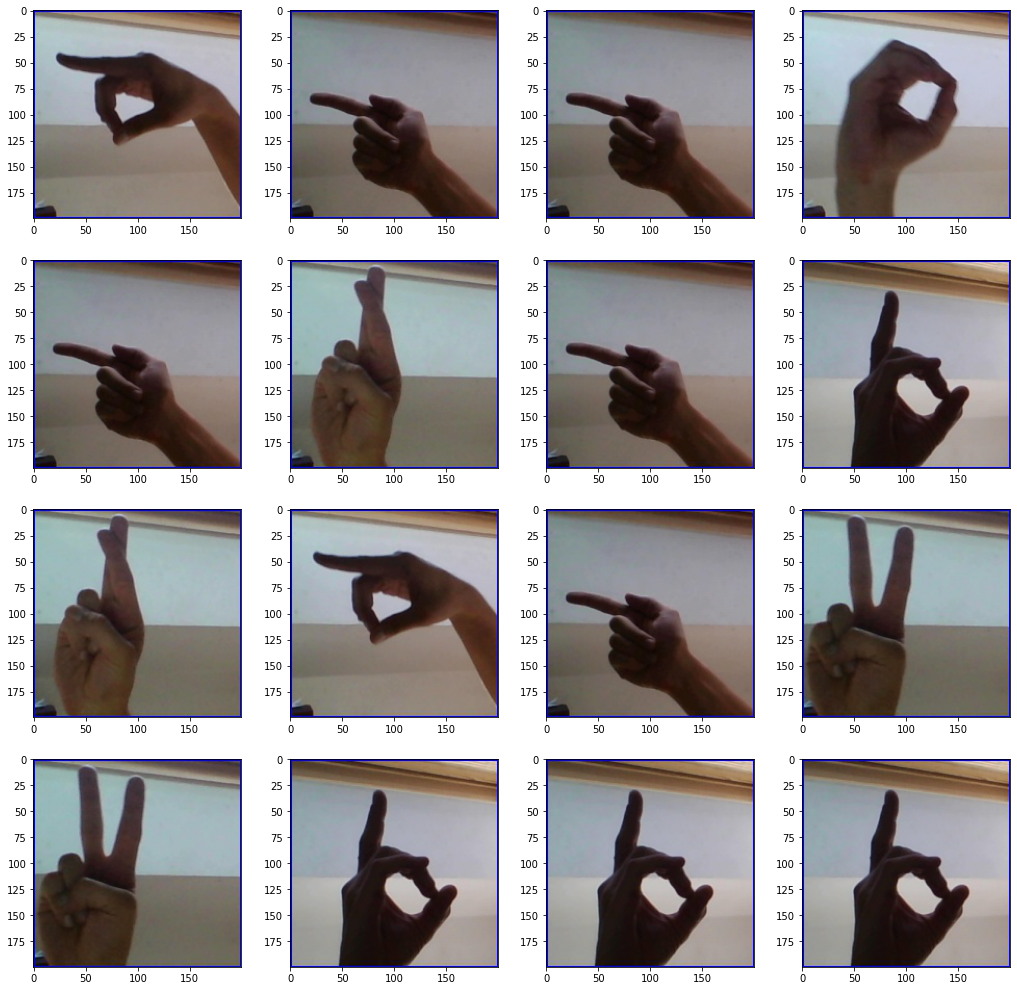

In [126]:
plt.figure(figsize=(2.2 * 8, 2.2 * 8))
count=0
for image_path in video_frames_data:
  plt.subplot(4,4,count+1)
  candidate_recognition_predictor(image_path)
  count= count+1

# **4. Observation**

## **Image Recognition Observations**
**MATTS HAND:**
Our first test yeilded some mixed results. We uploaded an image of Matt's hand to see how our code would handle it. The output image had some great similarities, in that it recognized the extended fingures and hand orientation, yet there was still room for improvement.
The image wasn't recognized perfectly so we decided to rework our code...

---
**KETANS HAND:**
Upon inputting an image of Ketan's hand in the shape of a peace sign, we started to see some incredible results. The algorithm was accurately recognizing the distinct features seen in the image, and outputa group of photos that were quite similar. Though again it was not a perfect match, this test clearly displayed the strength of our code and that we were on the right path.

---
**US FLAG:**
In order to better test the strength of our program, we decided to test it with an image we thought it would not expect: the US flag. The image of a US flag has seemingly little to due with hand gestures and would provide a unique yet interesting challenge to out code.The results were stunning. Though at first glance it may appeara random hand gesture was selected, upon closer selection, it actually quite closely resembles the features seen in the US flag. If you observe closely, the US flag as a square box in the top left, as well as a larger rectangular section towards the right of the image. Similarly, the gesture that was output is broken up into a smaller square on the left, with a larger rectange on the right. There were fascinating aspects of recognition we did not foresee as a possibility. Our code was strong enough to recognize a flag and output an image with striking similarities.

---
**FROG HAND:**
We decided to take this a step further and input the image of a frog hand. Once again, the algorithm produced some great results. Though there is of course no exact match in our database to a frog hand, many features of the hand, such as prominence of bones and curvature, can be seen in the output image. 


# **5. Conclusion**

Our algorithim appears to be quite the success, being able to scan abstract images and output a selected image by minimizing the norm between the candidate image and images in the database! To prove the efficacy of our algorithm, we ran the code multiple times with numerous candidate images, converging on optimal database recognition. The image we inserted was often recognized with great accuracy, to the extent that our code classified our letter correctly, and if it was incorrect, it was still abundantly obvious that there were large similarities between the recognized image and the candiate image.In the odd instance that we passed a candidate image that was not a gesture, namely a U.S. flag image, it was still amazingly obvious the recognized image results, resembling great similarity to the U.S.flag! Using the video to image frame by frame slicing opencv method, the resulting images were recognized relatively well for most images, but could be improved on the image preprocessing side.

---
As a final analysis, implementing edge detection, adaptive thresholding,transforming aligned images, blurring background, and hand detection to control the variables effecting the errors would make our algorithim more effective!